In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Time Series Studies/ENERGIA.XLS')
df['Ano'] = df['Ano'].ffill()
df = df.sort_values(['Ano','Mes'])

In [3]:
t = np.arange(1,np.array(len(df)) + 1)
serie = df['Energia']

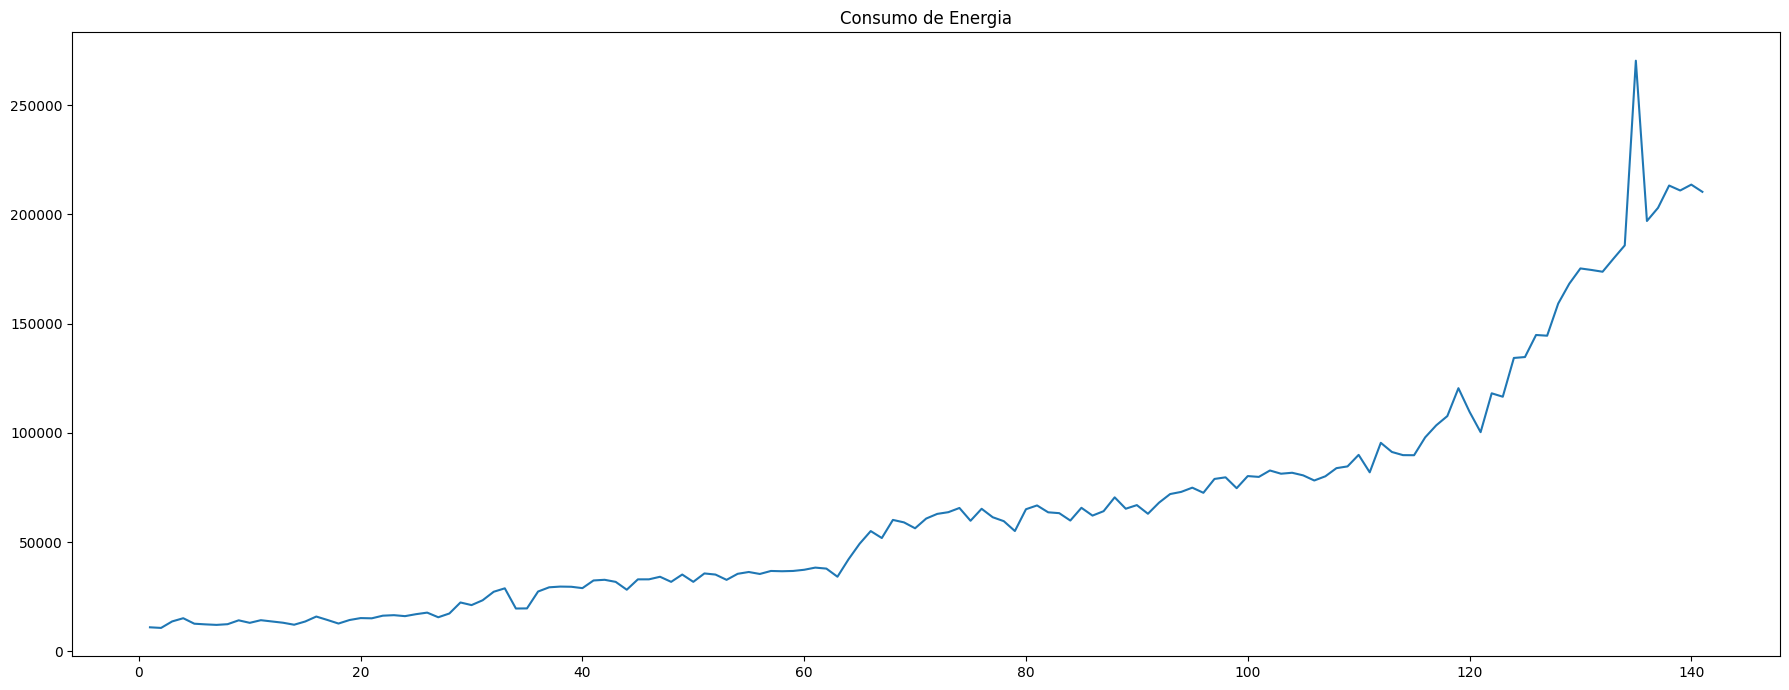

In [4]:
plt.figure(figsize=(18,7))
plt.plot(t, serie)
plt.title('Consumo de Energia')
plt.tight_layout()
plt.show()

In [5]:
nSamples = len(t)

nTestSamples = round(nSamples * 0.1)
nModel = nSamples - nTestSamples

In [6]:
# Separação de dados para modelagem

tModel = t[0:nModel]
ZtModel = serie[0:nModel]

# Separação de dados para teste

tTest = t[nModel:]
ZtTest = serie[nModel:]

Text(0, 0.5, 'Tempo')

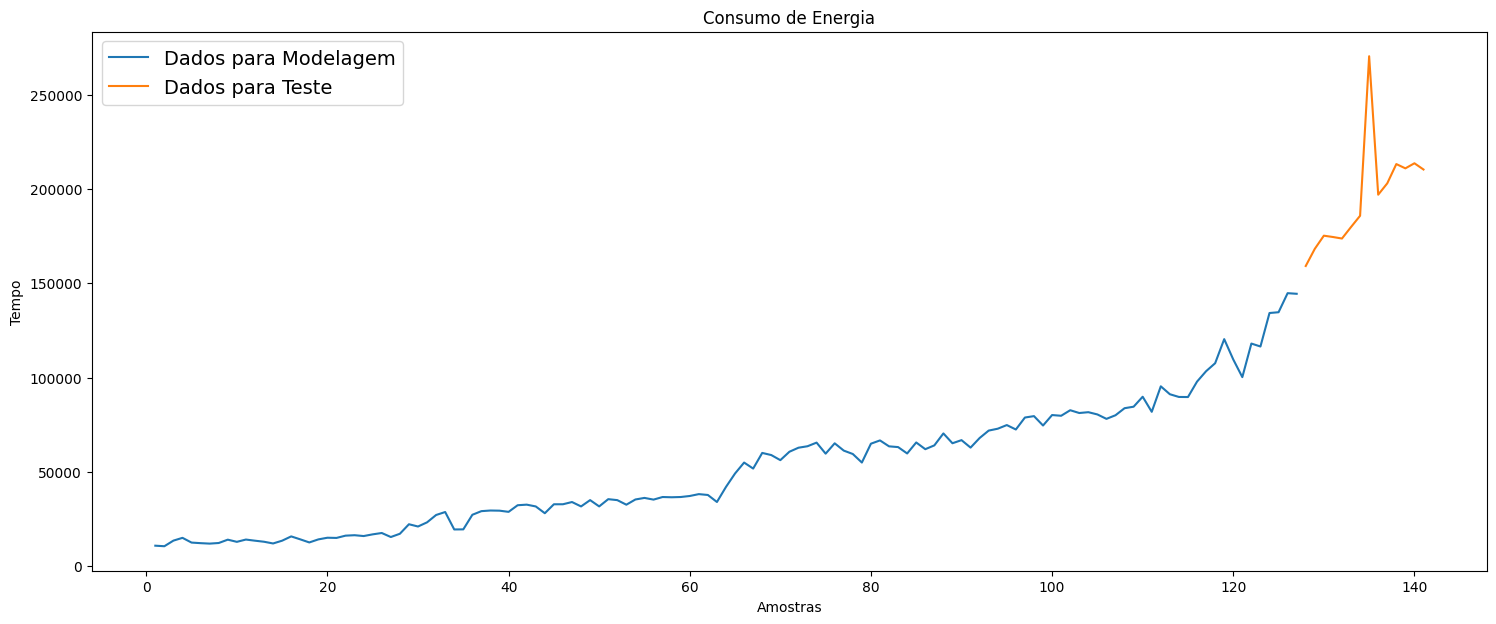

In [7]:
plt.figure(figsize = (18,7))

plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.legend(loc = 'upper left', prop = {'size':14})

plt.title('Consumo de Energia')
plt.xlabel('Amostras')
plt.ylabel('Tempo')

In [8]:
def MQtend(serie, pol_order, indice):

  N = len(serie)

  T = np.ones((N, pol_order +1))
  indice = indice.reshape(-1)

  # Criar a matriz T
  T = np.ones((N, pol_order + 1))
  for i in range(pol_order + 1):
      T[:, i] = indice ** i

  thetaMQ = np.dot(np.linalg.pinv(np.dot(T.T, T)), np.dot(T.T, serie))

  return thetaMQ

def MQestimativa(parametros, indice):
    N = len(indice)
    pol_order = len(parametros) - 1

    T = np.ones((N, pol_order + 1))

    for i in range(pol_order + 1):
        T[:, i] = (indice.T) ** i

    Zest = np.dot(T, parametros.T)
    return Zest

In [9]:
def polyfit(x_data, y_data, order):
  aorder = order + 1
  b = np.array(y_data)
  A = np.ones((len(b), aorder))
  for i in range(1, aorder):
    A[:,i] = np.array(x_data) ** i

  lsq = np.linalg.lstsq(A, b.T, rcond = None)
  x = lsq[0]

  try:
    norm = lsq[1][0] ** (0.5)
    return [x , norm]
  except IndexError:
    mnorm = sum((np.dot(A, x) - b) ** 2) ** (0.5)
    return [x, mnorm]

def polyest(theta, x_data):
  aorder = len(theta)
  A = np.ones((len(x_data), aorder))
  for i in range(1, aorder):
    A[:,i] = np.array(x_data) ** i

  Zest = np.dot(A, theta)

  return Zest

In [10]:
def evaluate_polynomial(coefficients, x_values):
    y_values = np.zeros_like(x_values, dtype=float)
    for i, coeff in enumerate(coefficients):
        y_values += coeff * x_values ** i
    return y_values

In [11]:
theta1 = polyfit(tModel,ZtModel,1)[0]
theta2 = polyfit(tModel,ZtModel,2)[0]
theta3 = polyfit(tModel,ZtModel,3)[0]
theta4 = polyfit(tModel,ZtModel,4)[0]
theta5 = polyfit(tModel,ZtModel,5)[0]
theta6 = polyfit(tModel,ZtModel,6)[0]
theta7 = polyfit(tModel,ZtModel,7)[0]

In [12]:
ZtModel1 = polyest(theta1,tModel)
ZtModel2 = polyest(theta2,tModel)
ZtModel3 = polyest(theta3,tModel)
ZtModel4 = polyest(theta4,tModel)
ZtModel5 = polyest(theta5,tModel)
ZtModel6 = polyest(theta6,tModel)
ZtModel7 = polyest(theta7,tModel)

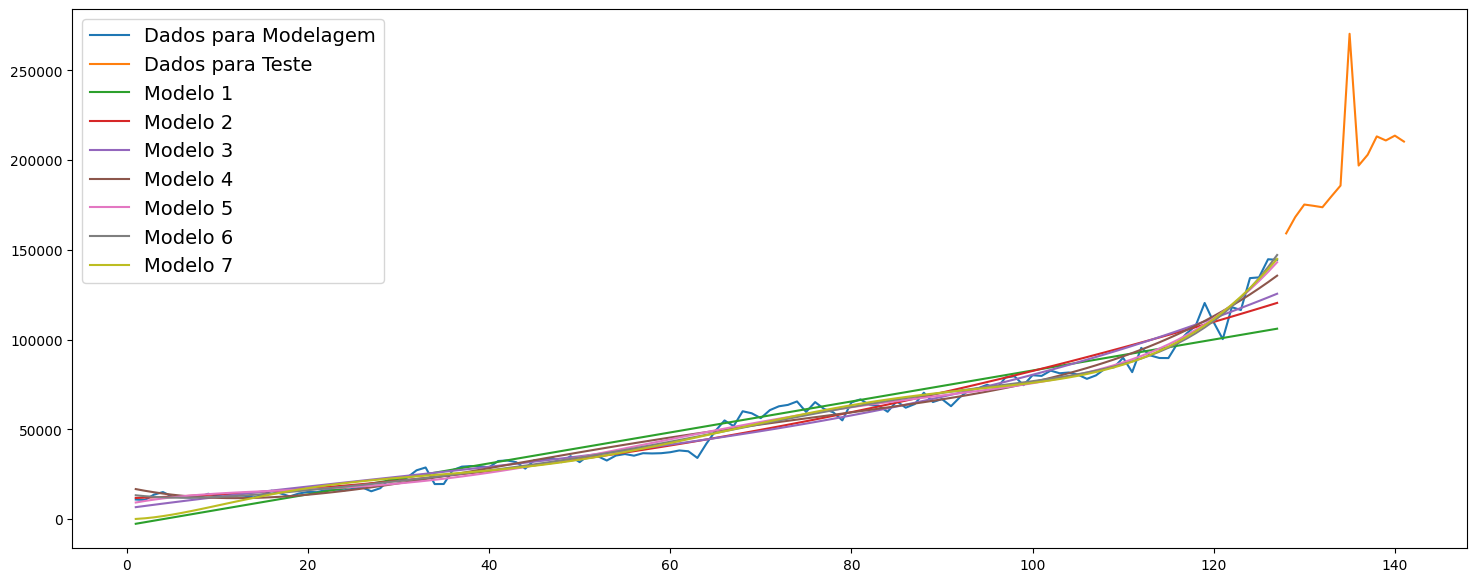

In [22]:
plt.figure(figsize = (18,7))
plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tModel,ZtModel1, label = 'Modelo 1')
plt.plot(tModel,ZtModel2, label = 'Modelo 2')
plt.plot(tModel,ZtModel3, label = 'Modelo 3')
plt.plot(tModel,ZtModel4, label = 'Modelo 4')
plt.plot(tModel,ZtModel5, label = 'Modelo 5')
plt.plot(tModel,ZtModel6, label = 'Modelo 6')
plt.plot(tModel,ZtModel7, label = 'Modelo 7')

plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()

In [14]:
res1 = abs(ZtModel1 - ZtModel)
res2 = abs(ZtModel2 - ZtModel)
res3 = abs(ZtModel3 - ZtModel)
res4 = abs(ZtModel4 - ZtModel)
res5 = abs(ZtModel5 - ZtModel)
res6 = abs(ZtModel6 - ZtModel)
res7 = abs(ZtModel7 - ZtModel)

res1med = np.mean(res1)
res2med = np.mean(res2)
res3med = np.mean(res3)
res4med = np.mean(res4)
res5med = np.mean(res5)
res6med = np.mean(res6)
res7med = np.mean(res7)

print(f'Média dos Resíduos do Modelo 1: {res1med}')
print(f'Média dos Resíduos do Modelo 2: {res2med}')
print(f'Média dos Resíduos do Modelo 3: {res3med}')
print(f'Média dos Resíduos do Modelo 4: {res4med}')
print(f'Média dos Resíduos do Modelo 5: {res5med}')
print(f'Média dos Resíduos do Modelo 6: {res6med}')
print(f'Média dos Resíduos do Modelo 7: {res7med}')

Média dos Resíduos do Modelo 1: 6475.014760458094
Média dos Resíduos do Modelo 2: 4628.977963372575
Média dos Resíduos do Modelo 3: 4582.768490478581
Média dos Resíduos do Modelo 4: 3855.342467733272
Média dos Resíduos do Modelo 5: 3376.6927037289765
Média dos Resíduos do Modelo 6: 3167.1817143202998
Média dos Resíduos do Modelo 7: 3958.578662766076


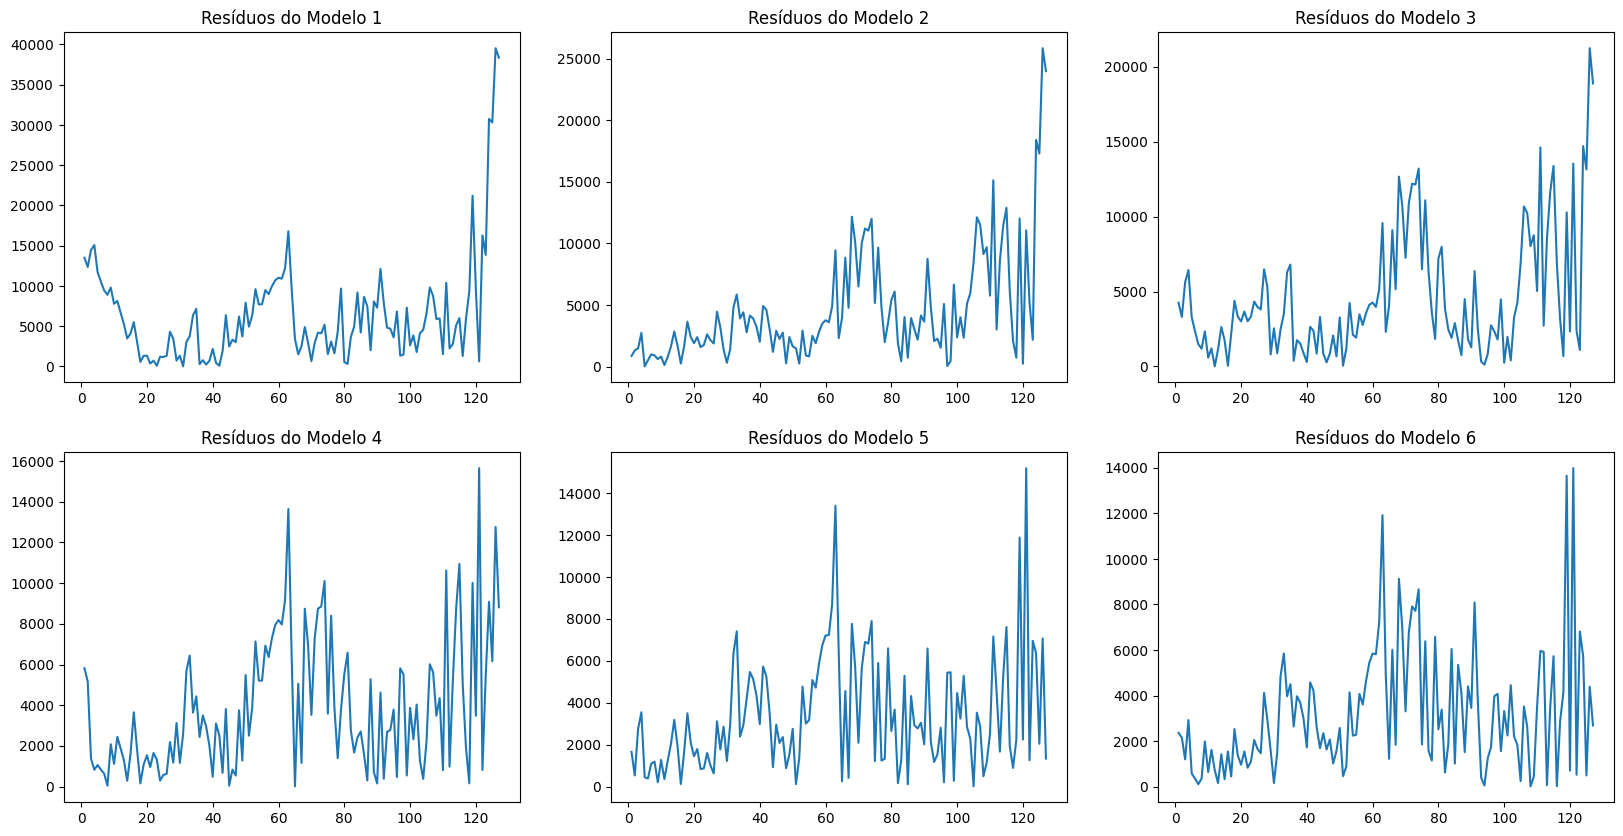

In [15]:
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
plt.plot(tModel,res1)
plt.title('Resíduos do Modelo 1')

plt.subplot(2,3,2)
plt.plot(tModel,res2)
plt.title('Resíduos do Modelo 2')

plt.subplot(2,3,3)
plt.plot(tModel,res3)
plt.title('Resíduos do Modelo 3')

plt.subplot(2,3,4)
plt.plot(tModel,res4)
plt.title('Resíduos do Modelo 4')

plt.subplot(2,3,5)
plt.plot(tModel,res5)
plt.title('Resíduos do Modelo 5')

plt.subplot(2,3,6)
plt.plot(tModel,res6)
plt.title('Resíduos do Modelo 6')

plt.show()

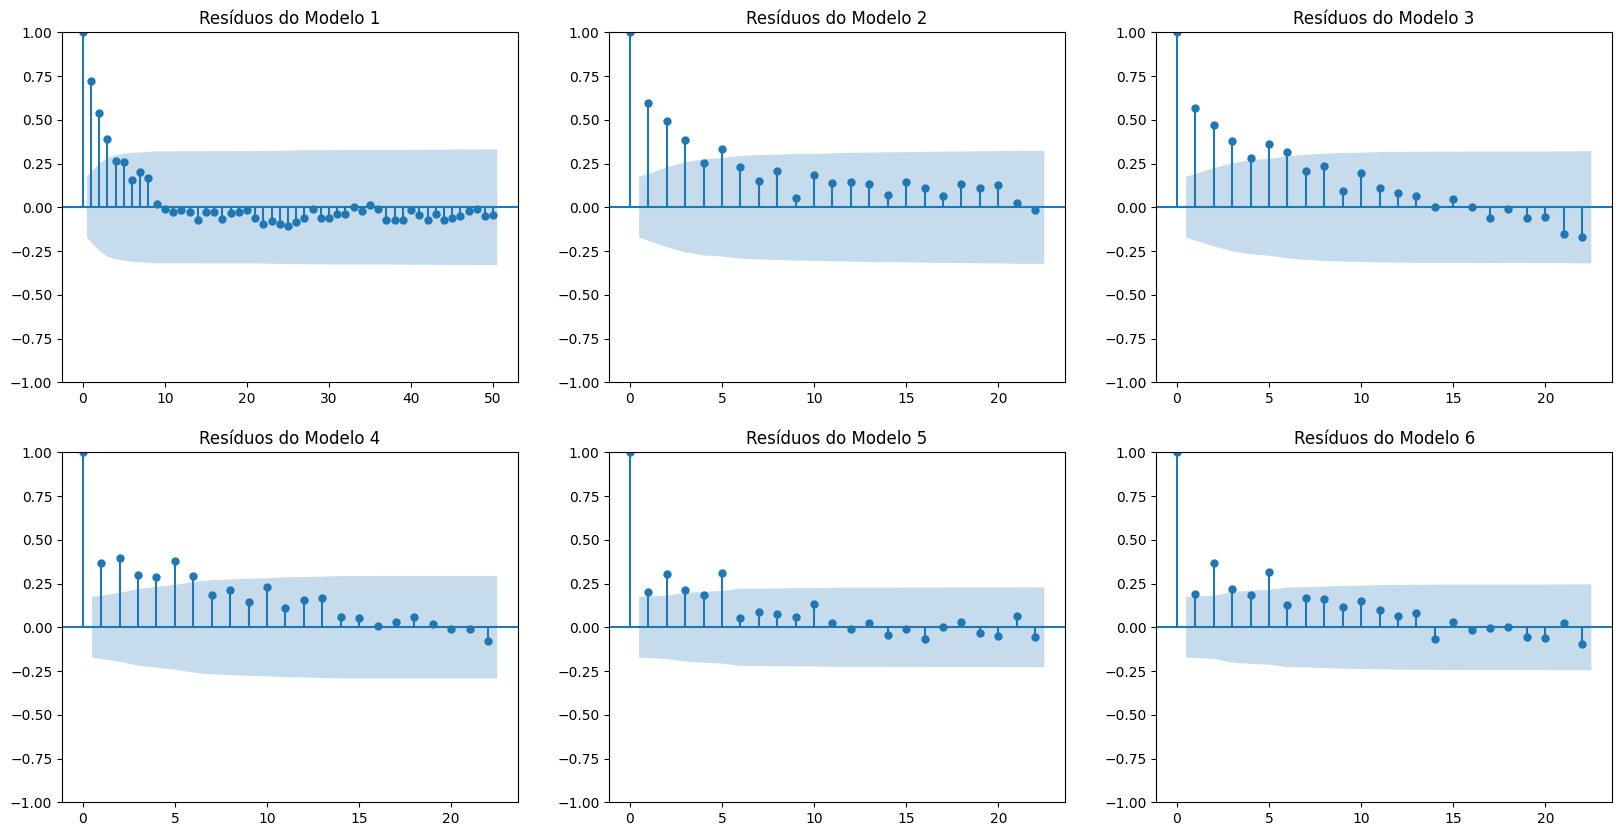

In [16]:
plt.figure(figsize = (20,10))

ax1 = plt.subplot(2,3,1)
plot_acf(res1, lags = 50, title = 'Função de Autocorrelação dos Resíduos', alpha = 0.05, ax = ax1)
plt.title('Resíduos do Modelo 1')

ax2 = plt.subplot(2,3,2)
plot_acf(res2, title = 'Função de Autocorrelação dos Resíduos', alpha = 0.05, ax = ax2)
plt.title('Resíduos do Modelo 2')

ax3 = plt.subplot(2,3,3)
plot_acf(res3, title = 'Função de Autocorrelação dos Resíduos', alpha = 0.05, ax = ax3)
plt.title('Resíduos do Modelo 3')

ax4 = plt.subplot(2,3,4)
plot_acf(res4, title = 'Função de Autocorrelação dos Resíduos', alpha = 0.05, ax = ax4)
plt.title('Resíduos do Modelo 4')

ax5 = plt.subplot(2,3,5)
plot_acf(res5, title = 'Função de Autocorrelação dos Resíduos', alpha = 0.05, ax = ax5)
plt.title('Resíduos do Modelo 5')

ax6 = plt.subplot(2,3,6)
plot_acf(res6, title = 'Função de Autocorrelação dos Resíduos', alpha = 0.05, ax = ax6)
plt.title('Resíduos do Modelo 6')

plt.show()

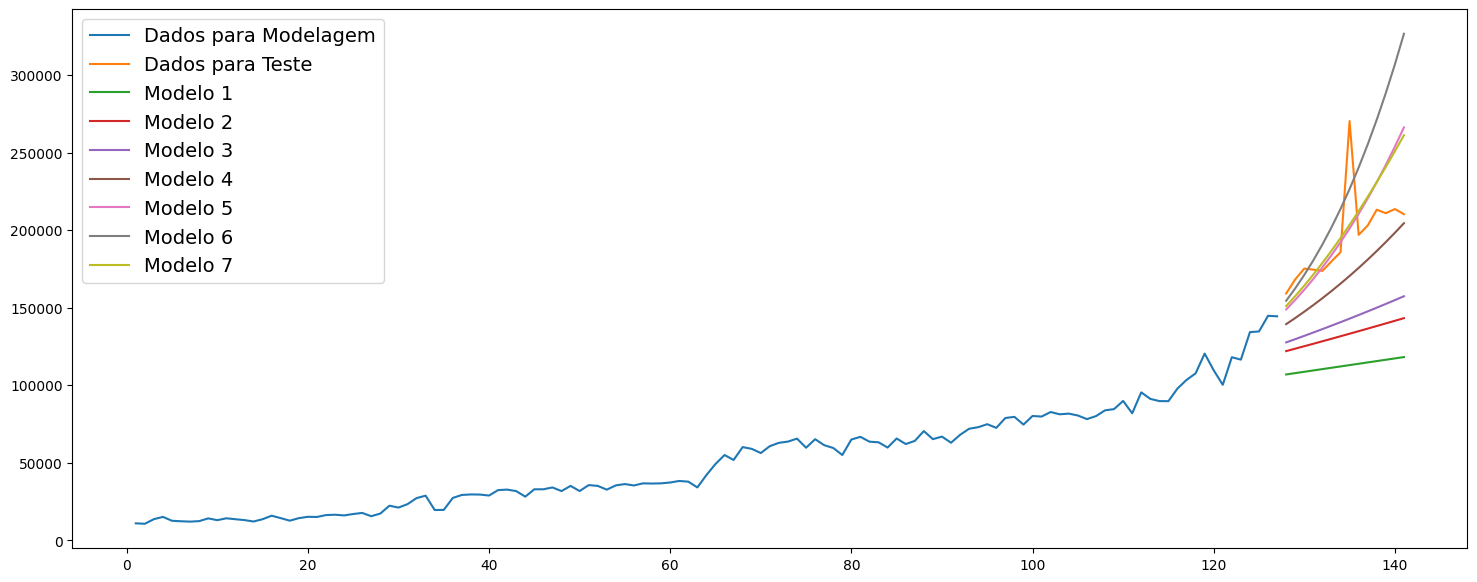

In [25]:
ZtTest1 = polyest(theta1, tTest)
ZtTest2 = polyest(theta2, tTest)
ZtTest3 = polyest(theta3, tTest)
ZtTest4 = polyest(theta4, tTest)
ZtTest5 = polyest(theta5, tTest)
ZtTest6 = polyest(theta6, tTest)
ZtTest7 = polyest(theta7, tTest)

plt.figure(figsize = (18,7))

plt.plot(tModel,ZtModel, label = 'Dados para Modelagem')
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tTest,ZtTest1, label = 'Modelo 1')
plt.plot(tTest,ZtTest2, label = 'Modelo 2')
plt.plot(tTest,ZtTest3, label = 'Modelo 3')
plt.plot(tTest,ZtTest4, label = 'Modelo 4')
plt.plot(tTest,ZtTest5, label = 'Modelo 5')
plt.plot(tTest,ZtTest6, label = 'Modelo 6')
plt.plot(tTest,ZtTest7, label = 'Modelo 7')


plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()

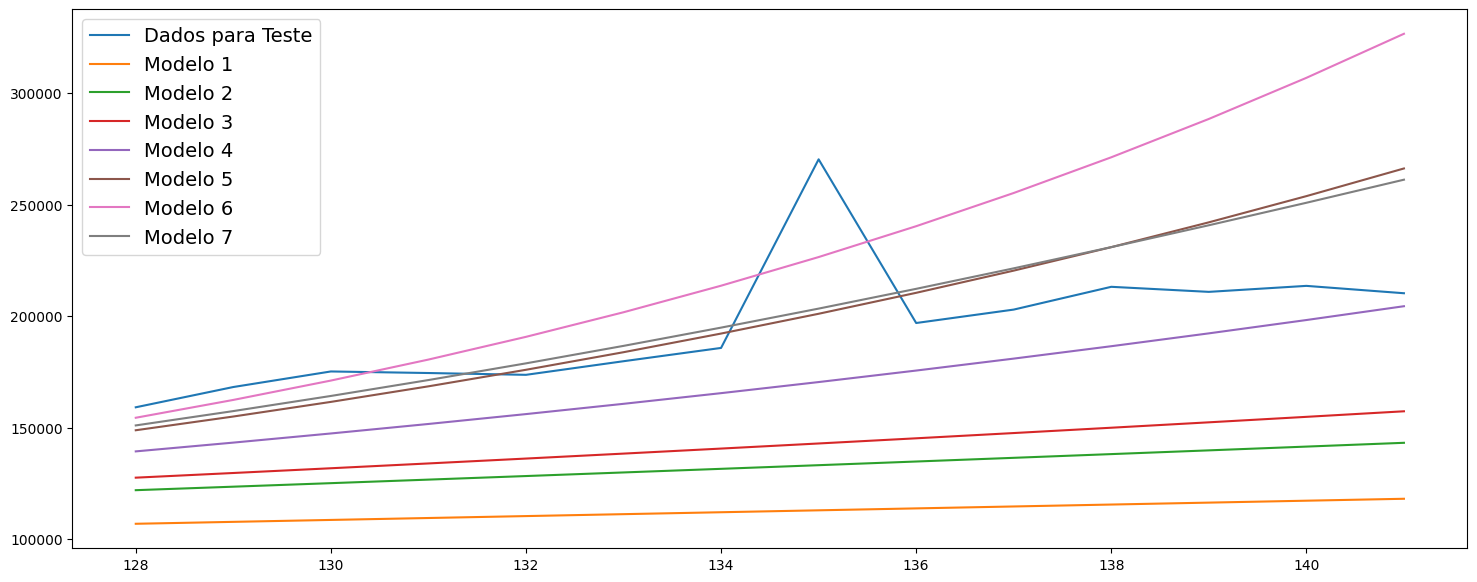

In [18]:
plt.figure(figsize = (18,7))
plt.plot(tTest,ZtTest, label = 'Dados para Teste')
plt.plot(tTest,ZtTest1, label = 'Modelo 1')
plt.plot(tTest,ZtTest2, label = 'Modelo 2')
plt.plot(tTest,ZtTest3, label = 'Modelo 3')
plt.plot(tTest,ZtTest4, label = 'Modelo 4')
plt.plot(tTest,ZtTest5, label = 'Modelo 5')
plt.plot(tTest,ZtTest6, label = 'Modelo 6')
plt.plot(tTest,ZtTest7, label = 'Modelo 7')

plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()

In [19]:
erro1 = abs(ZtTest1 - ZtTest) ** 2
erro2 = abs(ZtTest2 - ZtTest) ** 2
erro3 = abs(ZtTest3 - ZtTest) ** 2
erro4 = abs(ZtTest4 - ZtTest) ** 2
erro5 = abs(ZtTest5 - ZtTest) ** 2
erro6 = abs(ZtTest6 - ZtTest) ** 2
erro7 = abs(ZtTest7 - ZtTest) ** 2

erro1med = np.mean(erro1)
erro2med = np.mean(erro2)
erro3med = np.mean(erro3)
erro4med = np.mean(erro4)
erro5med = np.mean(erro5)
erro6med = np.mean(erro6)
erro7med = np.mean(erro7)

print(f'Média dos erros do Modelo 1: {erro1med}')
print(f'Média dos erros do Modelo 2: {erro2med}')
print(f'Média dos erros do Modelo 3: {erro3med}')
print(f'Média dos erros do Modelo 4: {erro4med}')
print(f'Média dos erros do Modelo 5: {erro5med}')
print(f'Média dos erros do Modelo 6: {erro6med}')
print(f'Média dos erros do Modelo 7: {erro7med}')

Média dos erros do Modelo 1: 7488633057.876488
Média dos erros do Modelo 2: 4505767049.312108
Média dos erros do Modelo 3: 3341808169.8649535
Média dos erros do Modelo 4: 1115877642.7156215
Média dos erros do Modelo 5: 848736876.1638783
Média dos erros do Modelo 6: 2842871877.3310065
Média dos erros do Modelo 7: 765094491.2905697


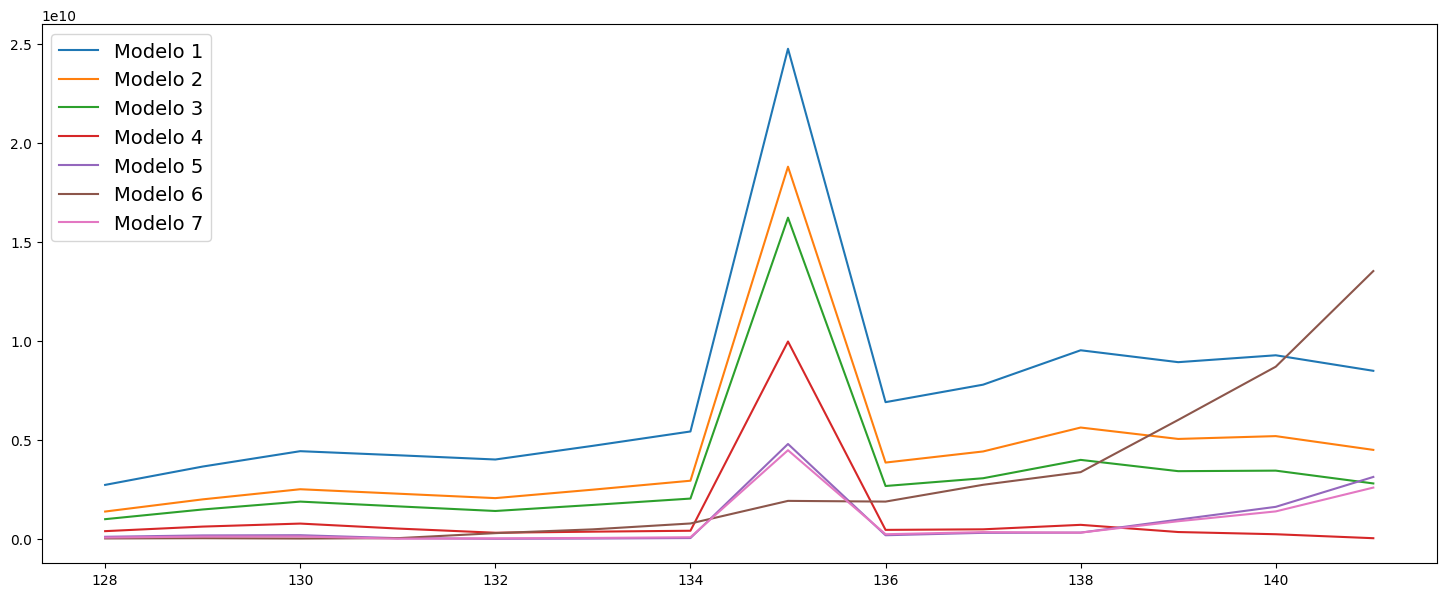

In [20]:
plt.figure(figsize = (18,7))

plt.plot(tTest,erro1, label = 'Modelo 1')
plt.plot(tTest,erro2, label = 'Modelo 2')
plt.plot(tTest,erro3, label = 'Modelo 3')
plt.plot(tTest,erro4, label = 'Modelo 4')
plt.plot(tTest,erro5, label = 'Modelo 5')
plt.plot(tTest,erro6, label = 'Modelo 6')
plt.plot(tTest,erro7, label = 'Modelo 7')

plt.legend(loc = 'upper left', prop = {'size':14})
plt.show()